In [1]:
# DNP Project Survey Analysis

# This code processes and analyzes survey data across multiple timepoints.
# Calculates means and standard deviations for different items and domains, and visualizes trends using plots.
# Workflow is designed to efficiently summarize and compare group outcomes before, after, and at follow-up.

# Created by: Hyang Yoon
# Created on: 10/25/2025
# Updated on: 10/29/2025

In [2]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# variables
raw = 'raw_data'                        # filename
n = 5                                   # data sample size - number of participants
col = ['pre','post','fu']
idx = ['c_dis','c_ide','u_ben','u_ava','f_bro','f_dis','flow']
dm = ['c','u','f']

In [4]:
# read raw data from csv
df = pd.read_csv(raw + '.csv',index_col=0)

In [5]:
# identify index for each item
c_dis = [0,1,14]
c_ide = [2,3,15]
u_ben = [4,5,16]
u_ava = [6,7,17]
f_bro = [8,9,18]
f_dis = [10,11,19]
flow = [12,13,20]

In [6]:
# create columns
df.loc[:,'tm'] = ''
df.loc[:,'im'] = ''
df.loc[:,'dm'] = ''

In [7]:
# identify column location
tm_loc = df.columns.get_loc('tm')
im_loc = df.columns.get_loc('im')
dm_loc = df.columns.get_loc('dm')

In [8]:
df_mean = pd.DataFrame(columns = col, index = idx)
df_std = pd.DataFrame(columns = col, index = idx)

In [9]:
# identify index for each timepoint
pre = np.arange(0,14,2)
post = np.arange(1,14,2)
fu = np.arange(14,21,1)

In [10]:
# create category column for timepoint
df.iloc[pre,tm_loc] = 'pre'
df.iloc[post,tm_loc] = 'post'
df.iloc[fu,tm_loc] = 'fu'

In [11]:
# create category for item
for ci in idx:
    df.iloc[eval(ci),im_loc] = ci

In [12]:
# identify index for each domain
c = c_dis + c_ide
u = u_ben + u_ava
f = f_bro + f_dis

In [13]:
# create category for domain
for di in dm: 
    df.iloc[eval(di),dm_loc] = di

In [14]:
# calculate item mean and std values
for t in col:
    for i in idx:
        m = [item for item in eval(t) if item in eval(i)]
        df_mean.loc[i,t] = df.iloc[m].mean(axis=1, numeric_only = True).values[0]
        df_std.loc[i,t] = df.iloc[m].std(axis=1, numeric_only = True).values[0]

In [15]:
# calculate overall mean and domain means
df_mean.loc['all'] = df_mean.mean(axis=0)
df_mean.loc['c'] = df_mean[df_mean.index.str.match('c_')].mean(axis=0)
df_mean.loc['u'] = df_mean[df_mean.index.str.match('u_')].mean(axis=0)
df_mean.loc['f'] = df_mean[df_mean.index.str.match('f_')].mean(axis=0)

In [16]:
# separate each item into own dataframe
i_data = {}
ii = 0
for i in idx:
    i_data[i] = pd.DataFrame(df.iloc[eval(i),:-3].values,index=col)
    ii = ii+1

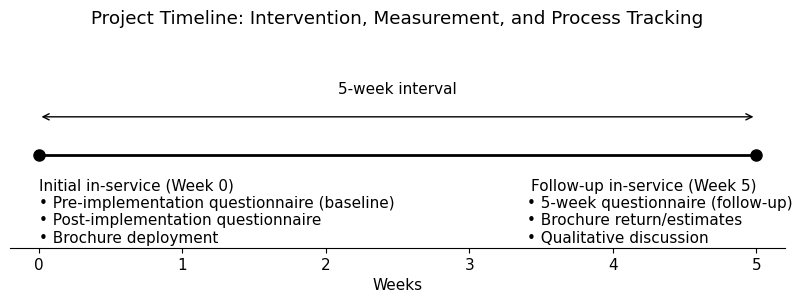

<Figure size 640x480 with 0 Axes>

In [17]:
# Figure 2
# prep figure
plt.rcParams.update({ "font.family": "DejaVu Sans", "font.size": 11 })
fig, ax = plt.subplots(figsize=(10, 2.8))

# build figure
ax.hlines(y=0, xmin=0, xmax=5, color="black", linewidth=2)
ax.plot(0, 0, 'o', color='black', markersize=8) 
ax.plot(5, 0, 'o', color='black', markersize=8)
ax.annotate( "", xy=(5, 0.25), xytext=(0, 0.25), arrowprops=dict(arrowstyle="<->", color="black", linewidth=1) ) 
ax.text(2.5, 0.38, "5‑week interval", ha="center", va="bottom")
ax.text( 0, -0.15, "Initial in‑service (Week 0)\n• Pre-implementation questionnaire (baseline)\n• Post-implementation questionnaire\n• Brochure deployment", ha="left", va="top" ) 
ax.text( 5, -0.15, "Follow‑up in‑service (Week 5)", ha="right", va="top" )
ax.text( 3.4, -0.15, "\n• 5‑week questionnaire (follow‑up)\n• Brochure return/estimates\n• Qualitative discussion", ha="left", va="top" )

# clean up figure
ax.set_ylim(-0.6, 0.8) 
ax.set_xlim(-0.2, 5.2) 
ax.set_yticks([])
ax.set_xticks([0, 1, 2, 3, 4, 5]) 
ax.set_xlabel("Weeks") 
for spine in ["left", "top", "right"]: 
    ax.spines[spine].set_visible(False)
ax.set_title("Project Timeline: Intervention, Measurement, and Process Tracking")
plt.show()

# print plot to png file 
plt.savefig('project_timeline.png', dpi=900, bbox_inches='tight')

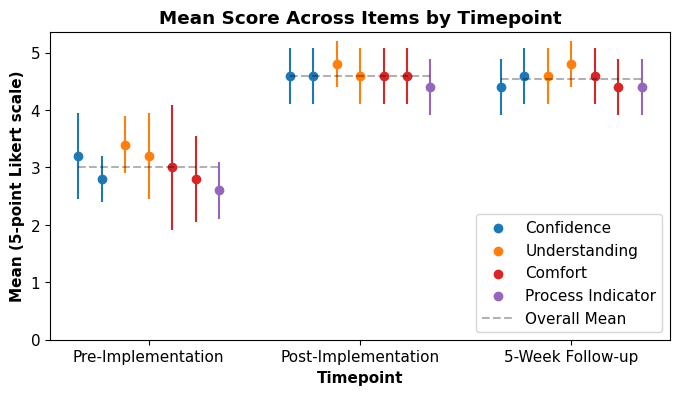

<Figure size 640x480 with 0 Axes>

In [27]:
# Figure 3
# prep figure
fig, ax = plt.subplots(figsize=(8, 4))

# set figure specific variabls
wd = 0.15 
pw = np.arange(len(idx))/2
x = np.arange(len(col))*4.5
lab = ['Confidence', '_Confidence', 'Understanding','_Understanding', 'Comfort','_Comfort','Process Indicator']

# scatter plot with errorbars
for k in np.arange(len(idx)):
    if 'c_' in idx[k]: 
        cu = 0
    elif 'u_' in idx[k]: 
        cu = 1
    elif 'f_' in idx[k]: 
        cu = 3
    else: 
        cu = 4
    plt.scatter(x+pw[k],df_mean.loc[idx[k]],color='C'+str(cu),label=lab[k])
    plt.errorbar(x+pw[k],df_mean.loc[idx[k]],i_data[idx[k]].loc[col].values.std(axis=1),linestyle='',color='C'+str(cu))

# plot overall mean lines
plt.plot([x[0],x[0]+pw[-1]], [df_mean.loc['all'].loc['pre'], df_mean.loc['all'].loc['pre']],linestyle='--', alpha=0.3, color='k')
plt.plot([x[1],x[1]+pw[-1]], [df_mean.loc['all'].loc['post'], df_mean.loc['all'].loc['post']],linestyle='--', alpha=0.3, color='k')
plt.plot([x[2],x[2]+pw[-1]], [df_mean.loc['all'].loc['fu'], df_mean.loc['all'].loc['fu']],linestyle='--', alpha=0.3, color='k', label='Overall Mean')

# cleaning up figure
plt.xticks(x+pw.mean(), ['Pre-Implementation','Post-Implementation','5-Week Follow-up'])
plt.yticks(np.arange(0,6,1))
plt.xlabel('Timepoint',fontweight='bold')
plt.ylabel('Mean (5-point Likert scale)',fontweight='bold')
plt.title('Mean Score Across Items by Timepoint',fontweight='bold')
plt.legend(loc='lower right')
plt.show()

# print plot to png file 
plt.savefig('item_mean.png', dpi=900, bbox_inches='tight')

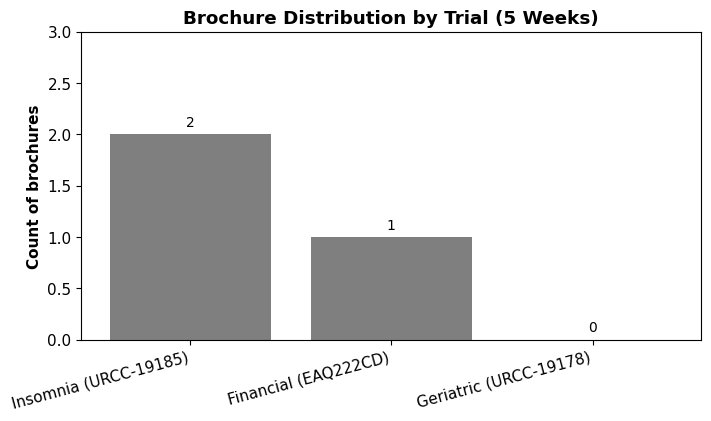

<Figure size 640x480 with 0 Axes>

In [19]:
# Figure 4
# prep figure
fig, ax = plt.subplots(figsize=(8, 4))

# set figure specific variabls
trials = ['Insomnia (URCC-19185)', 'Financial (EAQ222CD)', 'Geriatric (URCC-19178)'] 
counts = [2, 1, 0]

# bar plot 
bars = plt.bar(trials, counts, alpha=0.5, color='k') 

# update labels 
for b in bars: 
    plt.text(b.get_x() + b.get_width()/2, b.get_height() + 0.05, str(int(b.get_height())), ha="center", va="bottom", fontsize=10) 

# cleaning up figure
plt.ylabel('Count of brochures',fontweight='bold') 
plt.title("Brochure Distribution by Trial (5 Weeks)",fontweight='bold') 
plt.ylim(0, max(counts) + 1) 
plt.xticks(rotation=15, ha="right") 
plt.show()

# print plot to png file 
plt.savefig('brochure_distribution.png', dpi=900, bbox_inches='tight')